# Exploratory Data Analysis 

#### by George Levis

>This dataset comprises of 380,000 entries of used cars for sale from various online platforms. The data has been downloaded from a comprehensive used car dataset, providing in-depth information about each vehicle's type, age, condition, and more. The full dataset can be found at https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices


#### Preliminary Data Wrangling

In [142]:
# import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.seasonal import seasonal_decompose

In [143]:
cars_df = pd.read_csv('autos.csv', header = 0)
cars_df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,Angebot,480,test,NaN,1993,manual,0,golf,150000,0,gasoline,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,Angebot,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,Angebot,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,Angebot,1500,test,small car,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,Angebot,3600,test,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


##### Understanding the Data

In [144]:
#get the shape about the dataframe
print("rows: ", cars_df.shape[0]) 
print("columns: ", cars_df.shape[1])

rows:  371528
columns:  20


In [145]:
#get the information about the dataframe
print("Information about the data: ", cars_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [146]:
#get the sum of null values in each column
print("Missing values in the data: ", cars_df.isnull().sum()) 

Missing values in the data:  dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


In [147]:
#percentage of missing values in each column
blank_percent = cars_df.isnull().sum() * 100 / len(cars_df)
print("Percentage of missing values in each column: ", blank_percent)

Percentage of missing values in each column:  dateCrawled             0.000000
name                    0.000000
seller                  0.000000
offerType               0.000000
price                   0.000000
abtest                  0.000000
vehicleType            10.192771
yearOfRegistration      0.000000
gearbox                 5.439429
powerPS                 0.000000
model                   5.513447
kilometer               0.000000
monthOfRegistration     0.000000
fuelType                8.986133
brand                   0.000000
notRepairedDamage      19.395577
dateCreated             0.000000
nrOfPictures            0.000000
postalCode              0.000000
lastSeen                0.000000
dtype: float64


In [148]:
#check for duplicate rows
print("Number of duplicate rows: ", cars_df.duplicated().sum())

Number of duplicate rows:  4


In [149]:
#check the rows with missing values
print("Rows with missing values: ", cars_df.isna().all(axis=1).sum())

Rows with missing values:  0


In [150]:
#discriptive statistics of the data
cars_df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


#### Investigate some of the variables

In [151]:
# Check unique values in 'gearbox' column
print("Unique values in 'gearbox' column: ", cars_df['gearbox'].unique())

# Check the gearbox values
print("Number of values in 'gearbox' column: ", cars_df['gearbox'].value_counts())

Unique values in 'gearbox' column:  ['manual' 'automatic' nan]
Number of values in 'gearbox' column:  manual       274214
automatic     77105
Name: gearbox, dtype: int64


In [152]:
#check the vehicle type values
print("Number of values in 'vehicleType' column: ", cars_df['vehicleType'].value_counts())

Number of values in 'vehicleType' column:  limousine        95894
small car        80023
station wagon    67564
bus              30201
convertible      22898
coupe            19015
suv              14707
other             3357
Name: vehicleType, dtype: int64


In [153]:
#check the manufacturer values
print("Number of values in 'manufacturer' column: ", cars_df['brand'].value_counts().nlargest(15))

Number of values in 'manufacturer' column:  volkswagen       79640
bmw              40274
opel             40136
mercedes_benz    35309
audi             32873
ford             25573
renault          17969
peugeot          11027
fiat              9676
seat              7022
mazda             5695
skoda             5641
smart             5249
citroen           5182
nissan            5037
Name: brand, dtype: int64


In [154]:
# Check unique values in 'seller' column
print("Unique values in 'seller' column: ", cars_df['seller'].unique())

print(cars_df['seller'].value_counts())

Unique values in 'seller' column:  ['private' 'dealer']
private    371525
dealer          3
Name: seller, dtype: int64


In [155]:
# Check for unusual values in yearOfRegistration
print("Earliest registration year: ", cars_df["yearOfRegistration"].min())
print("Latest registration year: ", cars_df["yearOfRegistration"].max())

# Check for unusual values in monthOfRegistration
print("Earliest registration month: ", cars_df["monthOfRegistration"].min())
print("Latest registration month: ", cars_df["monthOfRegistration"].max())


Earliest registration year:  1000
Latest registration year:  9999
Earliest registration month:  0
Latest registration month:  12


### Notes on data


#### Data issues

*  `gearbox`: Missing values need addressing.
* `vehicleType`: Some missing values (10.19% missing). We will handle this variable.
* `brand`: Some brands far more common; could skew brand-based analysis.
* `seller`: 'Dealer' category is underrepresented that it might not provide meaningful information.
* `yearOfRegistration` and `monthOfRegistration`: Contains unrealistic values, data cleaning necessary.
* `price`: Contains outliers and unrealistic values (0 and excessively high).
* `fuelType`: Some missing values (8.99% missing). We will handle this variable.
* `notRepairedDamage`: Some missing values (19.40% missing). We will handle this variable.


### Data Clean


* `Drop Irrelevant Columns`

We can consider dropping abtest, dateCreated, nrOfPictures and lastSeen. These do not contribute significantly to our analysis and modeling.

* `Correct Data Types`

Convert yearOfRegistration and monthOfRegistration into a dateOfRegistration column.

* `Handle Unrealistic Data`

For price, let's limit the data to realistic values. For instance, we might only consider cars with prices between $1000 and $150,000.
Similarly, for yearOfRegistration, let's only consider vehicles with years between 1950 (year of the first car) and the current year. We can apply similar reasoning to monthOfRegistration, limiting the range to between 1 and 12.

* `Handle Missing Data`

Impute or delete the missing values in the gearbox, vehicleType, model, fuelType, and notRepairedDamage columnσ based on the strategy most suitable for your data and goals.

* `Create New Columns`

Create a vehicle_age column by subtracting the yearOfRegistration from the current year to allow for more in-depth analysis of how a vehicle's age affects its price.

#### Drop unneccessary columns

In [198]:
# Create a copy of the original DataFrame
cars_df_clean = cars_df.copy()

cars_df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,Angebot,480,test,NaN,1993,manual,0,golf,150000,0,gasoline,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,Angebot,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,Angebot,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,Angebot,1500,test,small car,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,Angebot,3600,test,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [199]:
#dropping  abtest, dateCreated, nrOfPictures and lastSeen
del_col = ['dateCrawled', 'abtest', 'dateCreated', 'nrOfPictures', 'lastSeen']
cars_df_clean.drop(columns = del_col, inplace = True )

In [200]:
#check the columns that we have
print(cars_df_clean.columns.tolist())

['name', 'seller', 'offerType', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'postalCode']


#### Correct Data Types & Handle Unrealistic Data

In [201]:
#filter that monthOfRegistration is between 1(Jan) to 12(Dec)
cars_df_clean = cars_df_clean[(cars_df_clean['monthOfRegistration'] > 0) & (cars_df_clean['monthOfRegistration'] <= 12)]

# Filter out rows with invalid or out-of-bounds values in yearOfRegistration and monthOfRegistration
valid_years = cars_df_clean['yearOfRegistration'].between(1950, 2023, inclusive=True)
valid_months = cars_df_clean['monthOfRegistration'].between(1, 12, inclusive=True)
cars_df_clean = cars_df_clean[valid_years & valid_months]

# Combine yearOfRegistration and monthOfRegistration to form dateOfRegistration
cars_df_clean['dateOfRegistration'] = pd.to_datetime(cars_df_clean['yearOfRegistration'].astype(str) + '-' + cars_df_clean['monthOfRegistration'].astype(str) + '-01')

# Drop the yearOfRegistration and monthOfRegistration columns
cars_df_clean.drop( columns = ['yearOfRegistration', 'monthOfRegistration'], inplace=True)

# Print the updated columns
cars_df_clean.columns.tolist()

# filter out zero and negative values from the 'price' column
cars_df_clean = cars_df_clean[(cars_df_clean['price'] > 1000) & (cars_df_clean['price'] < 150000)]

/var/folders/s4/snpqnqqs1gj8pc3k35d26llr0000gn/T/ipykernel_1273/1925112889.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  valid_years = cars_df_clean['yearOfRegistration'].between(1950, 2023, inclusive=True)
/var/folders/s4/snpqnqqs1gj8pc3k35d26llr0000gn/T/ipykernel_1273/1925112889.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  valid_months = cars_df_clean['monthOfRegistration'].between(1, 12, inclusive=True)


In [203]:
#Check the dateOfRegistration column for errors
cars_df_clean.dateOfRegistration

1        2011-05-01
2        2004-08-01
3        2001-06-01
4        2008-07-01
6        2004-08-01
            ...    
371523   2005-01-01
371524   2000-03-01
371525   1996-03-01
371526   2002-06-01
371527   2013-08-01
Name: dateOfRegistration, Length: 266187, dtype: datetime64[ns]

#### Handle Missing Data


In [161]:
# I'll fill the missing values with the mode (most frequent value), as this is a categorical variable.
cars_df_clean['vehicleType'].fillna(cars_df_clean['vehicleType'].mode()[0], inplace=True)
cars_df_clean['fuelType'].fillna(cars_df_clean['fuelType'].mode()[0], inplace=True)

In [205]:
# I'll fill the missing values of notRepairedDamage with "uknown", so we will understand if it is significant to know that if the car is damaged or not
cars_df_clean['notRepairedDamage'].fillna('unknown', inplace=True)
print('Rows: ', cars_df_clean.shape[0])
print('Columns: ', cars_df_clean.shape[1])

Rows:  266187
Columns:  14


##### Drop rows with missing values

In [207]:
# finally, drop rows with missing values
cars_df_clean = cars_df_clean.dropna(axis=0)

# check shape of clean dataframe
print('Rows: ', cars_df_clean.shape[0])
print('Columns: ', cars_df_clean.shape[1])
cars_df_clean.columns

Rows:  234772
Columns:  14


Index(['name', 'seller', 'offerType', 'price', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'postalCode', 'dateOfRegistration'],
      dtype='object')

#### Create vehicle age column


In [209]:
now = datetime.now()

# Calculate the age of each vehicle
cars_df_clean['vehicle_age'] = (now - cars_df_clean['dateOfRegistration']).dt.days // 365

cars_df_clean.head()

2        2004-08-01
3        2001-06-01
4        2008-07-01
6        2004-08-01
8        2014-08-01
            ...    
371521   2000-03-01
371524   2000-03-01
371525   1996-03-01
371526   2002-06-01
371527   2013-08-01
Name: dateOfRegistration, Length: 234772, dtype: datetime64[ns]

### Exploratory Data Analysis


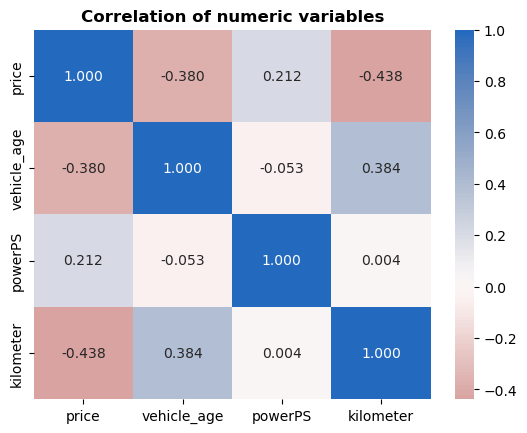

In [210]:
selected_columns = ['price', 'vehicle_age', 'powerPS', 'kilometer']
sns.heatmap(cars_df_clean[selected_columns].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Correlation of numeric variables', weight = 'bold')
plt.show()

>We can understand from the plot that the variable 'price' shows a moderate negative correlation with both 'vehicle_age' (-0.323) and 'kilometer' (-0.435). This indicates that as the age of the vehicle or the distance it has been driven (kilometer) increases, the price tends to decrease. The correlation between 'kilometer' and 'vehicle_age' (0.332) is positive, suggesting that as a car gets older, it is likely to have accumulated more kilometers. For the remaining pairs of variables, the correlation coefficients are close to zero, indicating a weak or negligible correlation. However, there is a weak positive correlation between 'price' and 'powerPS' (0.193), suggesting that vehicles with higher power output tend to have slightly higher prices, although the correlation is not very strong.

##### Average Price for Each Brand

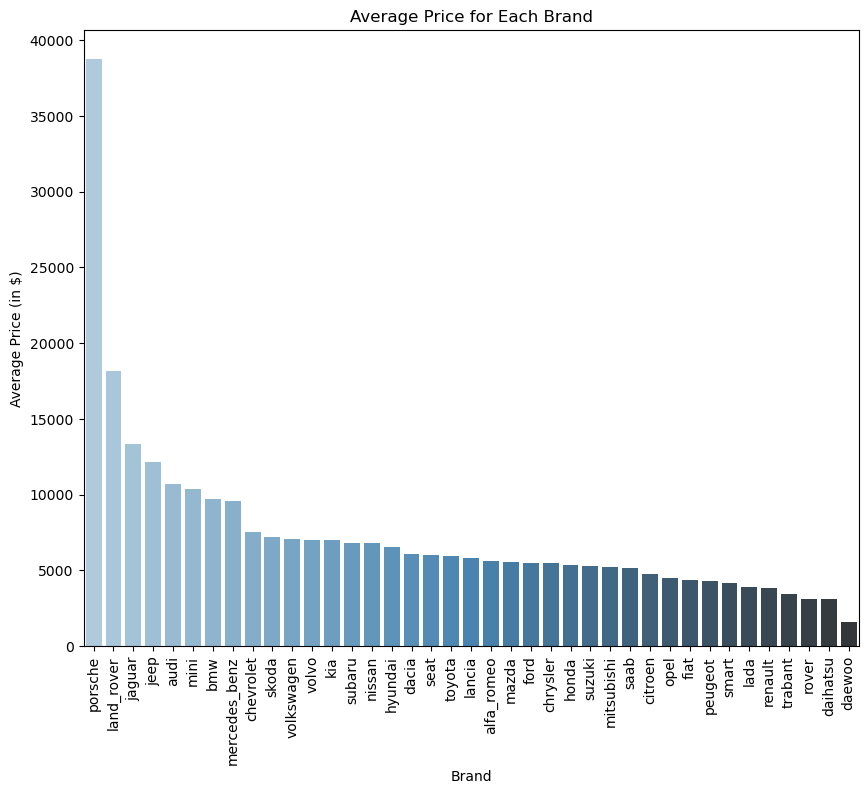

In [211]:
# Calculate the average price for each brand
average_price_per_brand = cars_df_clean.groupby('brand')['price'].mean().sort_values(ascending=False)

# Create a bar plot of the results
plt.figure(figsize=(10, 8))
sns.barplot(x=average_price_per_brand.index, y=average_price_per_brand.values, palette="Blues_d")
plt.title('Average Price for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (in $)')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


> Based on the plot, it is evident that the brand with the highest average price is Porsche. The average price for Porsche vehicles stands out prominently compared to other brands in the dataset.

#####  Average Price for Each Vehicle Type

In [212]:
# Calculate the average price for each vehicle type
average_price_per_vehicle_type = cars_df_clean.groupby('vehicleType')['price'].mean().sort_values(ascending=False)
print(average_price_per_vehicle_type)

vehicleType
suv              14042.362911
coupe            12366.662638
convertible      11029.226019
bus               7485.997073
limousine         7327.737320
station wagon     7178.844834
other             5605.986731
small car         4150.321113
Name: price, dtype: float64


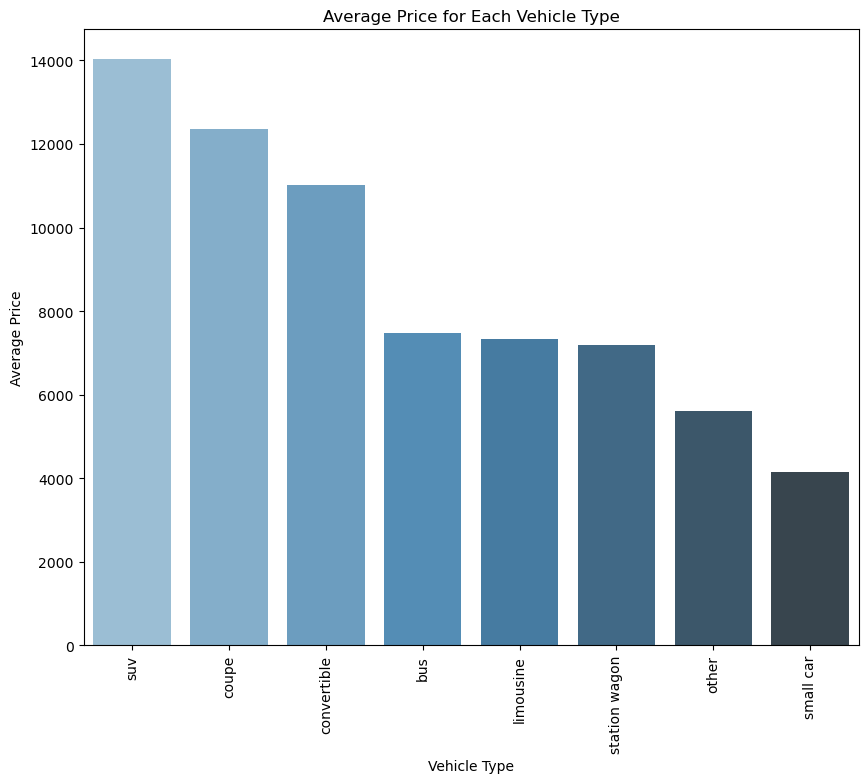

In [213]:
# Create a bar plot of the results
plt.figure(figsize=(10, 8))
sns.barplot(x=average_price_per_vehicle_type.index, y=average_price_per_vehicle_type.values, palette="Blues_d")
plt.title('Average Price for Each Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

>Based on the plot, we can observe that the average vehicle prices vary significantly depending on the vehicle type. The "suv" category has the highest average price at suv 13.981.

##### Top 10 Most Frequent Vehicle Models

In [214]:
# Count the frequency of each model and select the top 10
top_10_models = cars_df_clean['model'].value_counts().head(10)
print(top_10_models)

golf        18706
andere      17505
3er         15080
a4           7665
passat       7150
5er          6999
c_klasse     6809
polo         6438
astra        6108
e_klasse     6057
Name: model, dtype: int64


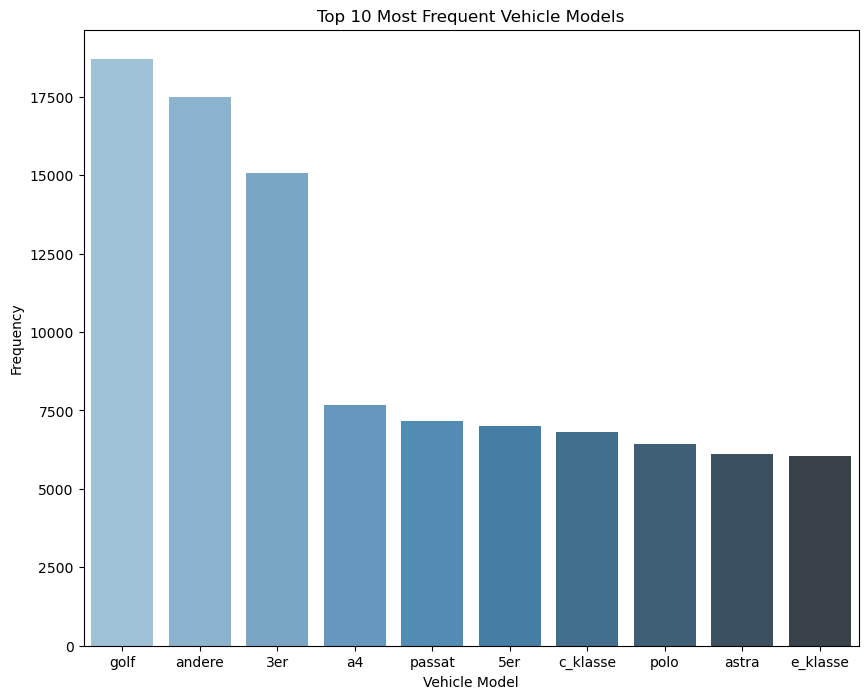

In [215]:
# Create a bar plot of the results
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_models.index, y=top_10_models.values, palette="Blues_d")
plt.title('Top 10 Most Frequent Vehicle Models')
plt.xlabel('Vehicle Model')
plt.ylabel('Frequency')
plt.show()

>Based on the given information, the most frequently occurring vehicle model among the top 15 is "golf" with a count of 20.527 followed by "andere". The other models in the list, such as "3er," "polo," "corsa," "astra," "a4," "passat," "c_klasse," and "5er," also occur frequently but with lower counts compared to "golf" and "andere."

##### Average Vehicle Price by Model - Top 10 by Volume

In [216]:
# Calculate the average price for each model
avg_price_per_model = cars_df_clean.groupby('model')['price'].mean()

# Select the average prices for the top 10 models
avg_price_top_10_models = avg_price_per_model.loc[top_10_models.index]
avg_price_top_10_models = avg_price_top_10_models.sort_values(ascending=False)

print(avg_price_top_10_models)

e_klasse    9272.748886
5er         9126.852836
andere      9030.571208
a4          7996.915851
c_klasse    7983.921574
3er         7176.378515
golf        6537.081257
passat      6112.637343
astra       4508.091028
polo        4272.312209
Name: price, dtype: float64


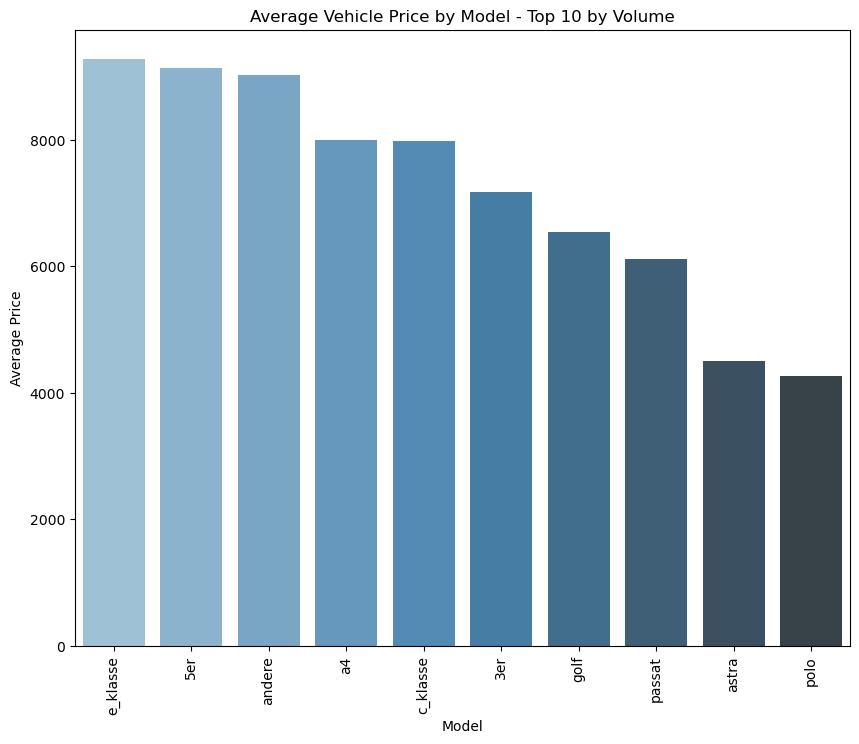

In [217]:
# Create a bar plot of the average price
plt.figure(figsize=(10, 8))
sns.barplot(x=avg_price_top_10_models.index, y=avg_price_top_10_models, palette="Blues_d")
plt.title('Average Vehicle Price by Model - Top 10 by Volume')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  
plt.show()


>The findings show the average vehicle prices for the top 10 models based on volume. The "e_klasse" has the highest average price ($9,091.12), followed closely by the "5er" ($9,017.40) and "andere" ($8,913.40). The "a4" and "c_klasse" models also have relatively higher average prices ($7,891.70 and $7,829.16). The "astra" and "polo" models have lower average prices ($4,423.99 and $4,187.78). These findings provide insights into the pricing trends of popular vehicle models.

##### Frequency of Gearbox Types

In [218]:
# Calculate the frequency of each gearbox type
gearbox_counts = cars_df_clean['gearbox'].value_counts()

#Calculate the percentages of gearboxs
print((gearbox_counts / len(cars_df_clean)) * 100)

manual       74.064624
automatic    25.935376
Name: gearbox, dtype: float64


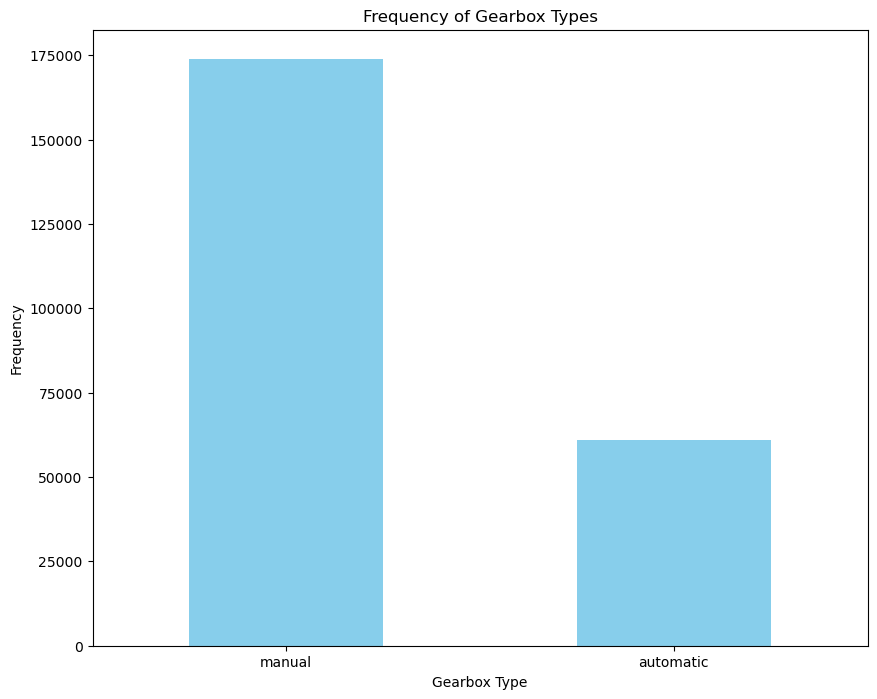

In [219]:
#Making the plot
plt.figure(figsize=(10, 8))
gearbox_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Gearbox Types')
plt.xlabel('Gearbox Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


> A whooping 75% of vehicles have manual gearbox

##### Average Vehicle Price by fuel type.

In [220]:
#Calculate the average price for each fuel type
average_price_per_fuel_type = cars_df_clean.groupby('fuelType')['price'].mean().sort_values(ascending=False)

print(average_price_per_fuel_type)

fuelType
hybrid      14420.009479
electric    11116.870370
diesel       9419.511675
gasoline     6588.091592
cng          5264.170404
lpg          4905.543663
other        4719.037736
Name: price, dtype: float64


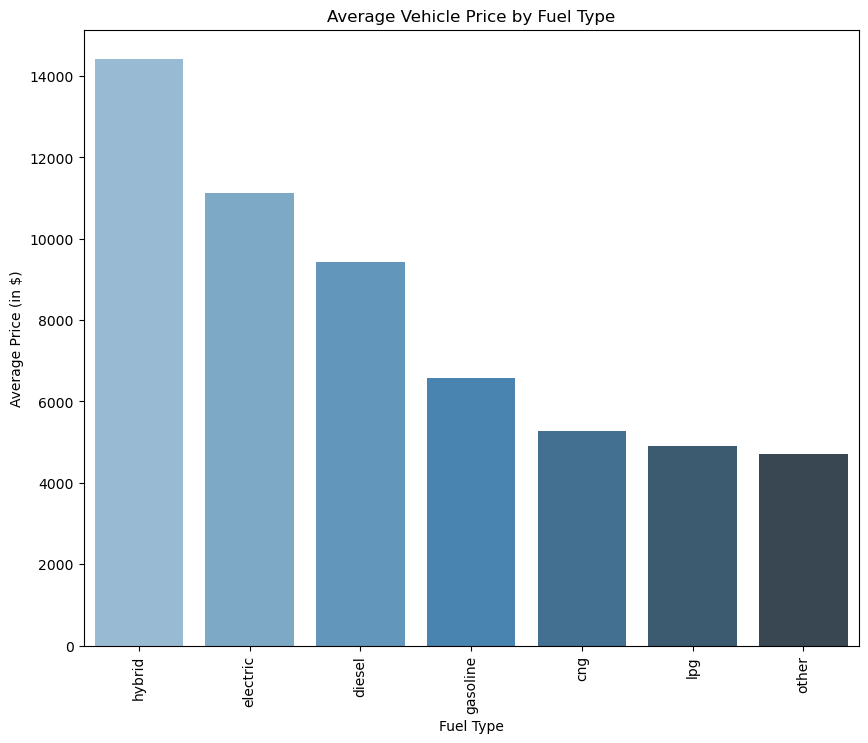

In [221]:
# Create a bar plot of the results
plt.figure(figsize=(10, 8))
sns.barplot(x=average_price_per_fuel_type.index, y=average_price_per_fuel_type.values, palette="Blues_d")
plt.title('Average Vehicle Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (in $)')
plt.xticks(rotation=90)  
plt.show()


> The findings indicate that hybrid fuel type has the highest average vehicle price, followed by electric and diesel. Gasoline, CNG, LPG, and other fuel types have comparatively lower average vehicle prices.

##### How is vehicle age distributed?

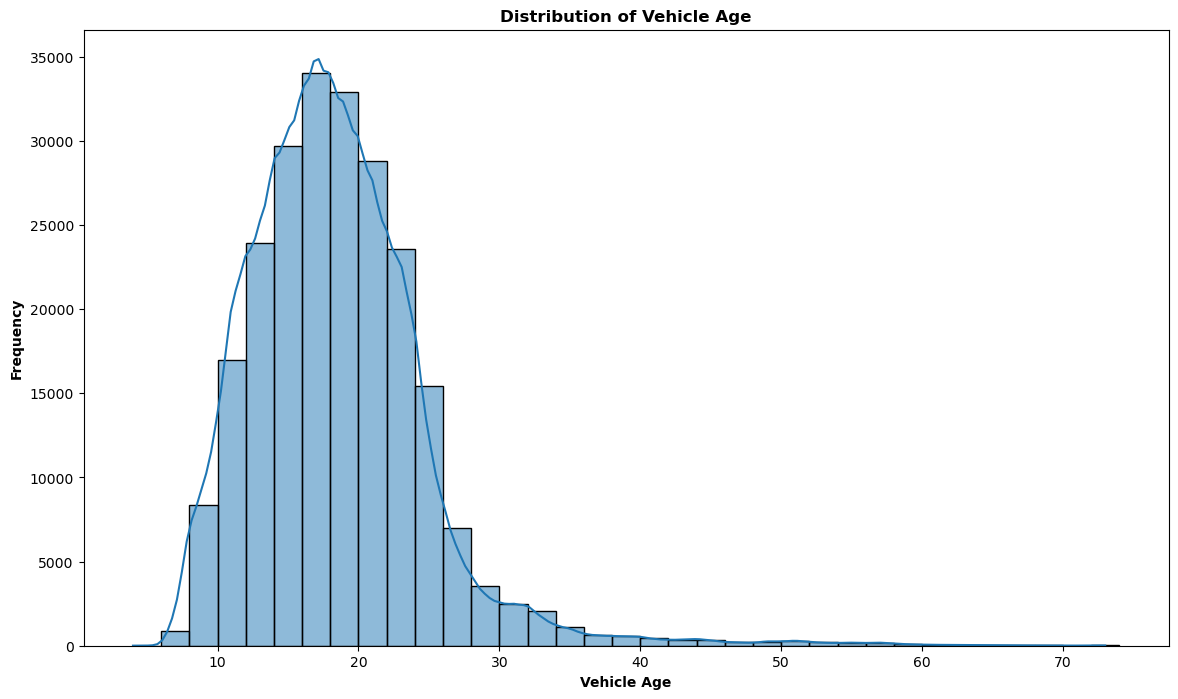

In [222]:
# histogram of vehicle age
plt.figure(figsize=[14, 8])
sns.histplot(data = cars_df_clean, x = 'vehicle_age', binwidth = 2, kde = True)
plt.xlabel('Vehicle Age', weight = 'bold')
plt.ylabel('Frequency', weight = 'bold')
plt.title('Distribution of Vehicle Age', weight = 'bold');

> Distribution skewed to the right. The bulk of vehicles are in the 5 to 25 year old range. There is a long tail to the right leading out to the 70 year-old range.

##### How is vehicle age distributed?

In [223]:
# mean of vehicle price
cars_df_clean.price.mean()

7650.429063090999

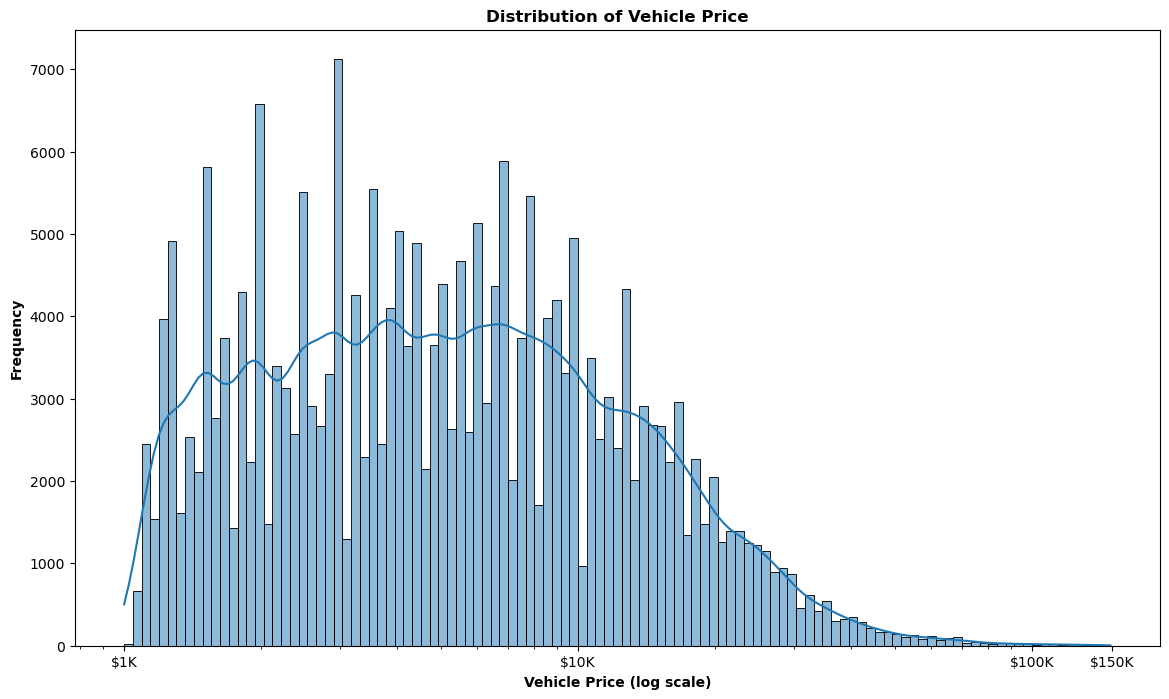

In [224]:
# histogram of vehicle price
plt.figure(figsize=[14, 8])
sns.histplot(data = cars_df_clean, x = 'price', log_scale = True, kde = True)
plt.xlabel('Vehicle Price (log scale)', weight = 'bold')
plt.xticks([1000, 10000, 100000, 150000],
           ['$1K', '$10K', '$100K', '$150K'])
plt.ylabel('Frequency', weight = 'bold')
plt.title('Distribution of Vehicle Price', weight = 'bold');

> The mean price is 6.247. This distirbution is multi-model is right_skewed.

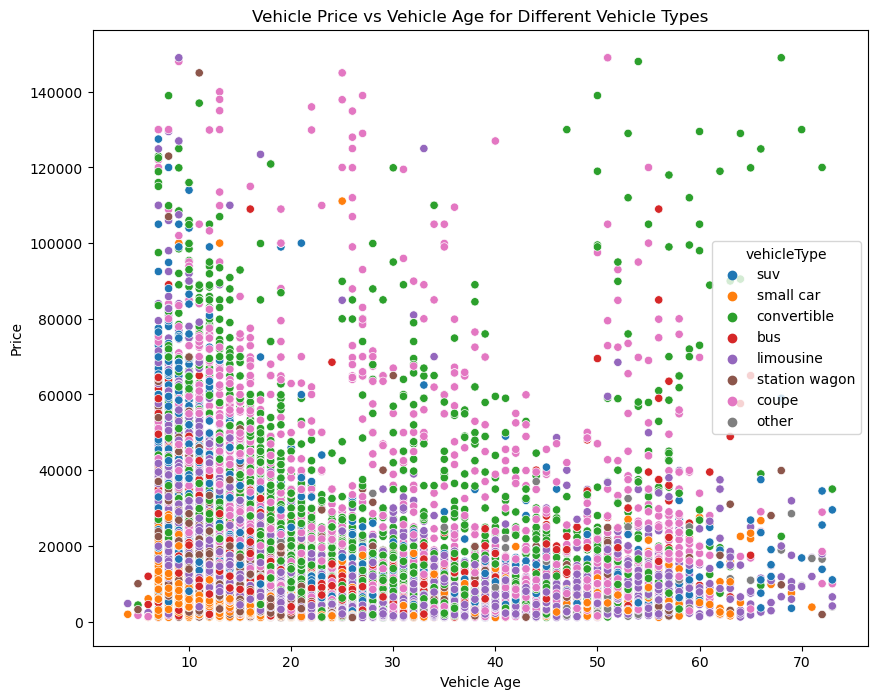

In [225]:
#Create a scatter plot of vehicle price vs. vehicle age with different drive types
plt.figure(figsize=(10, 8))
sns.scatterplot(x='vehicle_age', y='price', hue='vehicleType', data=cars_df_clean)
plt.title('Vehicle Price vs Vehicle Age for Different Vehicle Types')
plt.xlabel('Vehicle Age')
plt.ylabel('Price')
plt.show()


> Based on the plot, we can observe that convertible and some coupe cars retain their value over time. On the other hand, we see that SUVs are expensive when they are relatively new, but their prices decrease as they age. Small cars and limousines generally have lower prices across all ages.

##### Average Vehicle Price by Damage Status

In [226]:
# Calculate the average price for each damage category
avg_price_per_damage = cars_df_clean.groupby('notRepairedDamage')['price'].mean()
print(avg_price_per_damage)


notRepairedDamage
no         8140.149181
unknown    5207.841357
yes        4229.010224
Name: price, dtype: float64


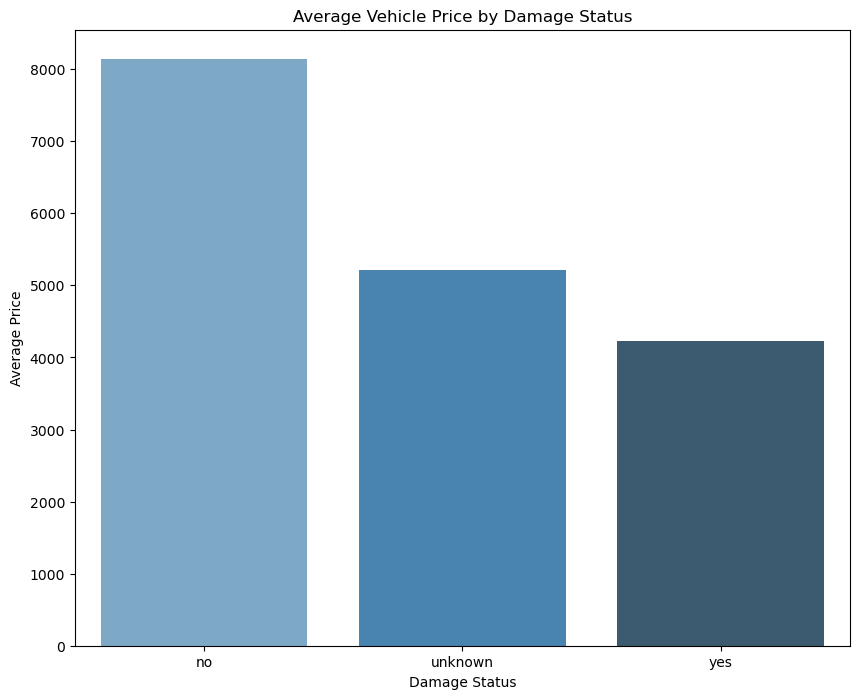

In [227]:
# Create a bar plot of the average price
plt.figure(figsize=(10, 8))
sns.barplot(x=avg_price_per_damage.index, y=avg_price_per_damage, palette="Blues_d")
plt.title('Average Vehicle Price by Damage Status')
plt.xlabel('Damage Status')
plt.ylabel('Average Price')
plt.show()

> Based on the average prices, it appears that the damage status of a car significantly affects its price. Cars with no unrepaired damage have the highest average price, suggesting that they are more desirable to buyers. Cars with unknown damage status have a lower average price, possibly reflecting uncertainty about their condition. Cars with unrepaired damage have the lowest average price, indicating that buyers are less willing to pay for cars that need repairs.

##### What is the distribution of brand across damage status?

In [228]:
# Calculate the order of the brands by count
brand_order = cars_df_clean['brand'].value_counts().index
print(brand_order)

Index(['volkswagen', 'bmw', 'mercedes_benz', 'audi', 'opel', 'ford', 'renault',
       'peugeot', 'fiat', 'skoda', 'seat', 'toyota', 'mazda', 'smart',
       'citroen', 'mini', 'nissan', 'hyundai', 'volvo', 'porsche', 'kia',
       'honda', 'mitsubishi', 'suzuki', 'alfa_romeo', 'chevrolet', 'chrysler',
       'dacia', 'land_rover', 'jeep', 'jaguar', 'subaru', 'saab', 'daihatsu',
       'lancia', 'daewoo', 'rover', 'trabant', 'lada'],
      dtype='object')


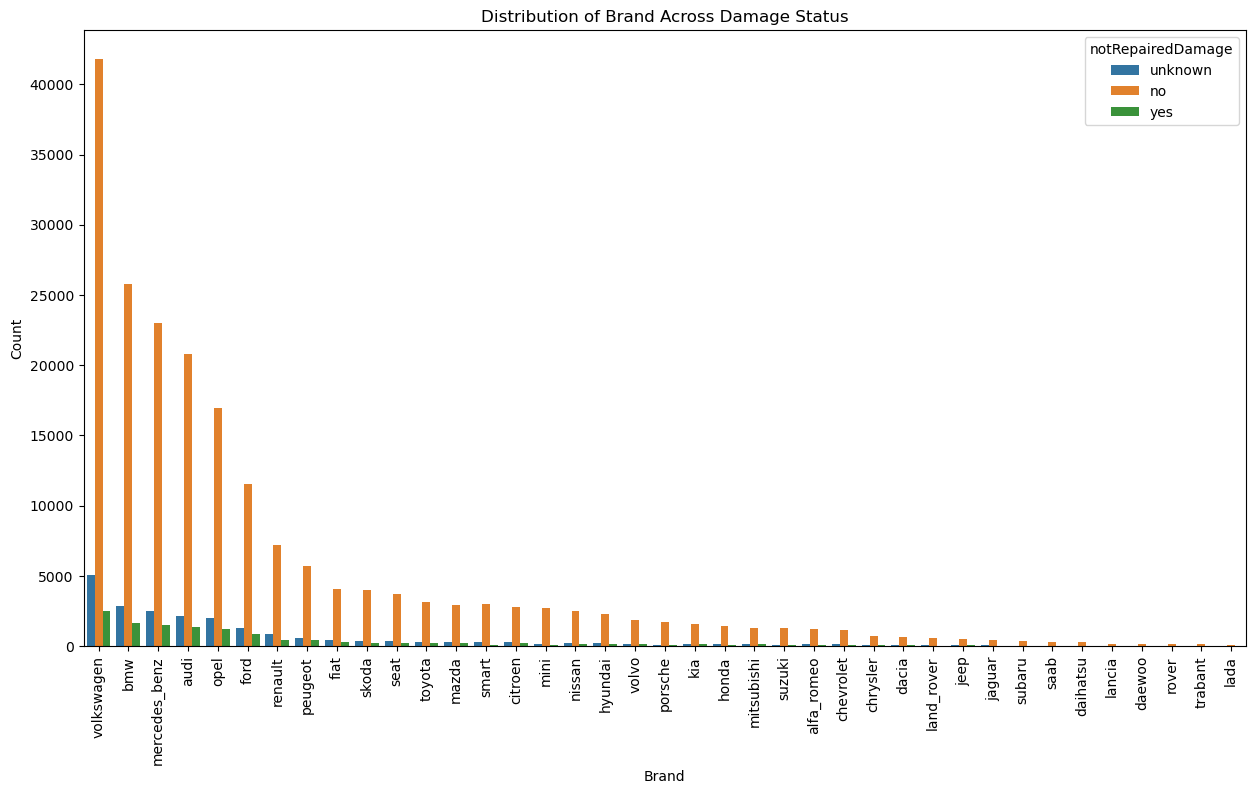

In [229]:
# Create a count plot of the brand column
plt.figure(figsize=(15, 8))
sns.countplot(data=cars_df_clean, x='brand', hue='notRepairedDamage', order=brand_order,)
plt.title('Distribution of Brand Across Damage Status')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()


>Volkswagen and bmw vehicles are most frequent across damage status and well ahead with vehicles without damage.

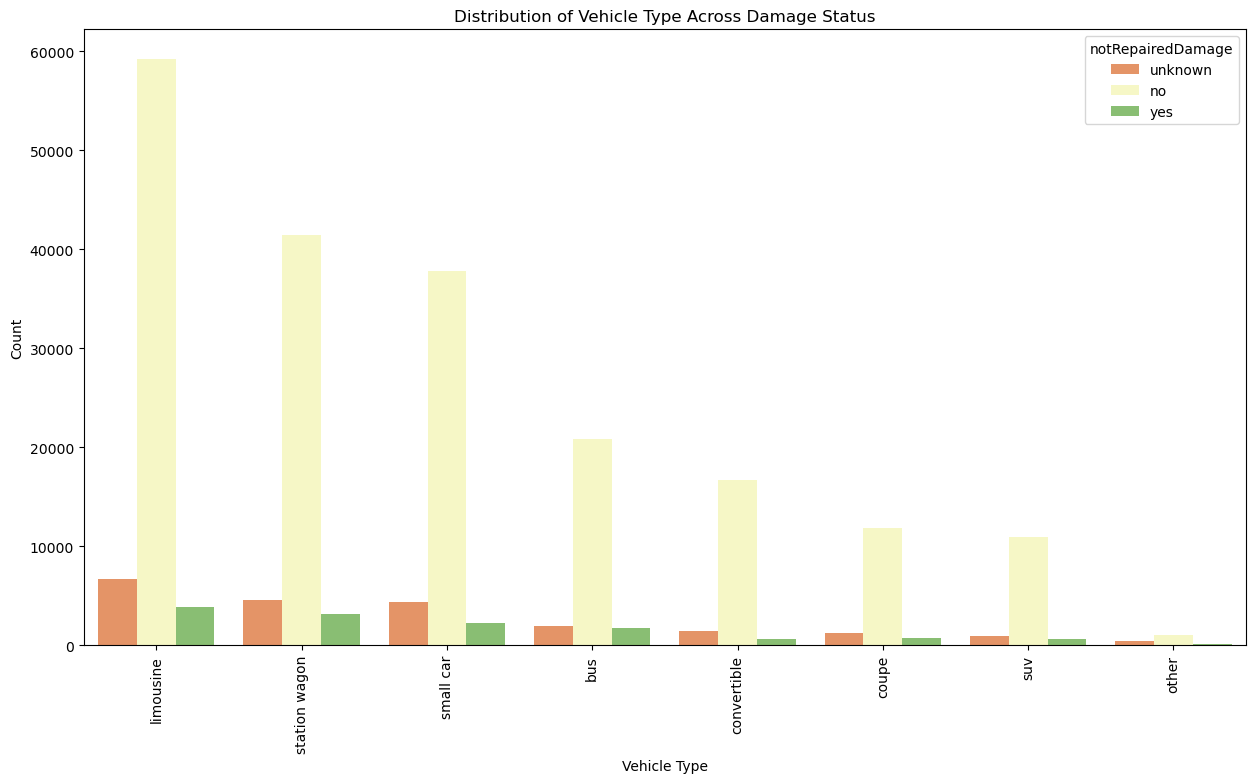

In [230]:
# Calculate the order of the vehicle types by count
vehicle_type_order = cars_df_clean['vehicleType'].value_counts().index

# Create a count plot of the vehicleType column, sorted by count and using the 'RdYlGn' palette
plt.figure(figsize=(15, 8))
sns.countplot(data=cars_df_clean, x='vehicleType', hue='notRepairedDamage', order=vehicle_type_order, palette='RdYlGn')
plt.title('Distribution of Vehicle Type Across Damage Status')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


> Limousines and small cars occur most frequently across vehicle damage status, with a significant number of these vehicles having no unrepaired damage. SUVs, while not as frequent as limousines and small cars, also predominantly have no unrepaired damage. On the other hand, vehicles categorized as 'other' are less frequent and have a higher proportion of unknown damage status or unrepaired damage."

#### Multivariate Exploration

##### What is the average vehicle price by brand across damage status?

In [231]:
# Calculate the overall average price for each brand
avg_price_per_brand = cars_df_clean.groupby('brand')['price'].mean()

# Sort the brands by the overall average price in descending order
brand_order = avg_price_per_brand.sort_values(ascending=False).index

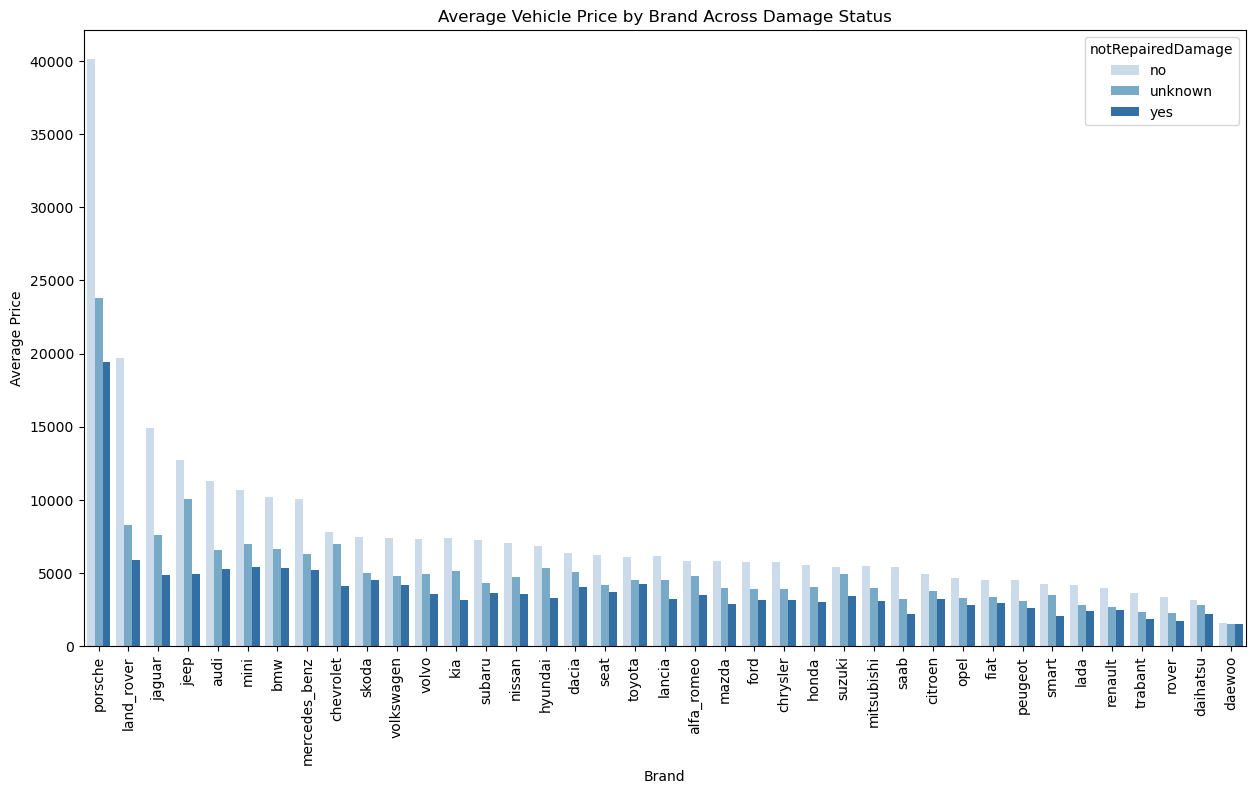

In [232]:
# Create a bar plot of the average price for each brand and damage status, sorted by the overall average price
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_price_per_brand_damage, x='brand', y='price', hue='notRepairedDamage', order=brand_order, palette='Blues')
plt.title('Average Vehicle Price by Brand Across Damage Status')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


> The average price of used cars varies significantly by brand and damage status. Generally, luxury brands like Porsche, Land Rover, and Jaguar have higher average prices, even for cars with unrepaired damage. Cars with no known damage tend to fetch higher prices across all brands. For some brands, the average price of cars with unknown damage status is lower than those with known damage, suggesting that buyers may be factoring in the risk of potential unknown damage.

##### What is the distribution of vehicle price by vehicle type across damage status?

/var/folders/s4/snpqnqqs1gj8pc3k35d26llr0000gn/T/ipykernel_1273/3167585353.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = cars_df_clean, y = 'price', x = 'vehicleType', hue = 'notRepairedDamage',


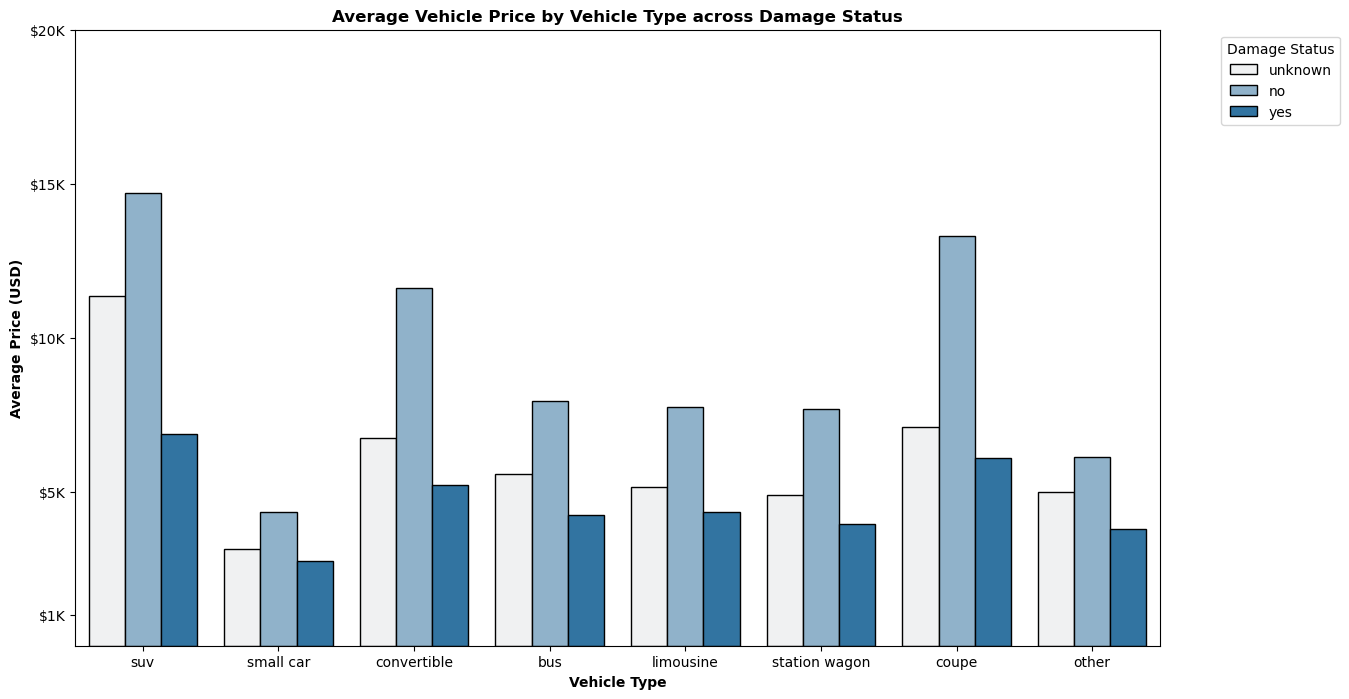

In [233]:
plt.figure(figsize=[14, 8])
sns.barplot(data = cars_df_clean, y = 'price', x = 'vehicleType', hue = 'notRepairedDamage', 
            color = sns.color_palette()[0], ci = None, edgecolor = 'black', errcolor = 'Red')
plt.yticks([1000, 5000, 10000, 15000, 20000],
          ['$1K', '$5K', '$10K', '$15K', '$20K'])
plt.xlabel('Vehicle Type', weight = 'bold')
plt.ylabel('Average Price (USD)', weight = 'bold')
plt.title('Average Vehicle Price by Vehicle Type across Damage Status', weight = 'bold')
plt.legend(title = 'Damage Status', bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


> Suvs and coupes without damage have the highest average prices

##### What is the distribution of vehicle age by brand across damage status?

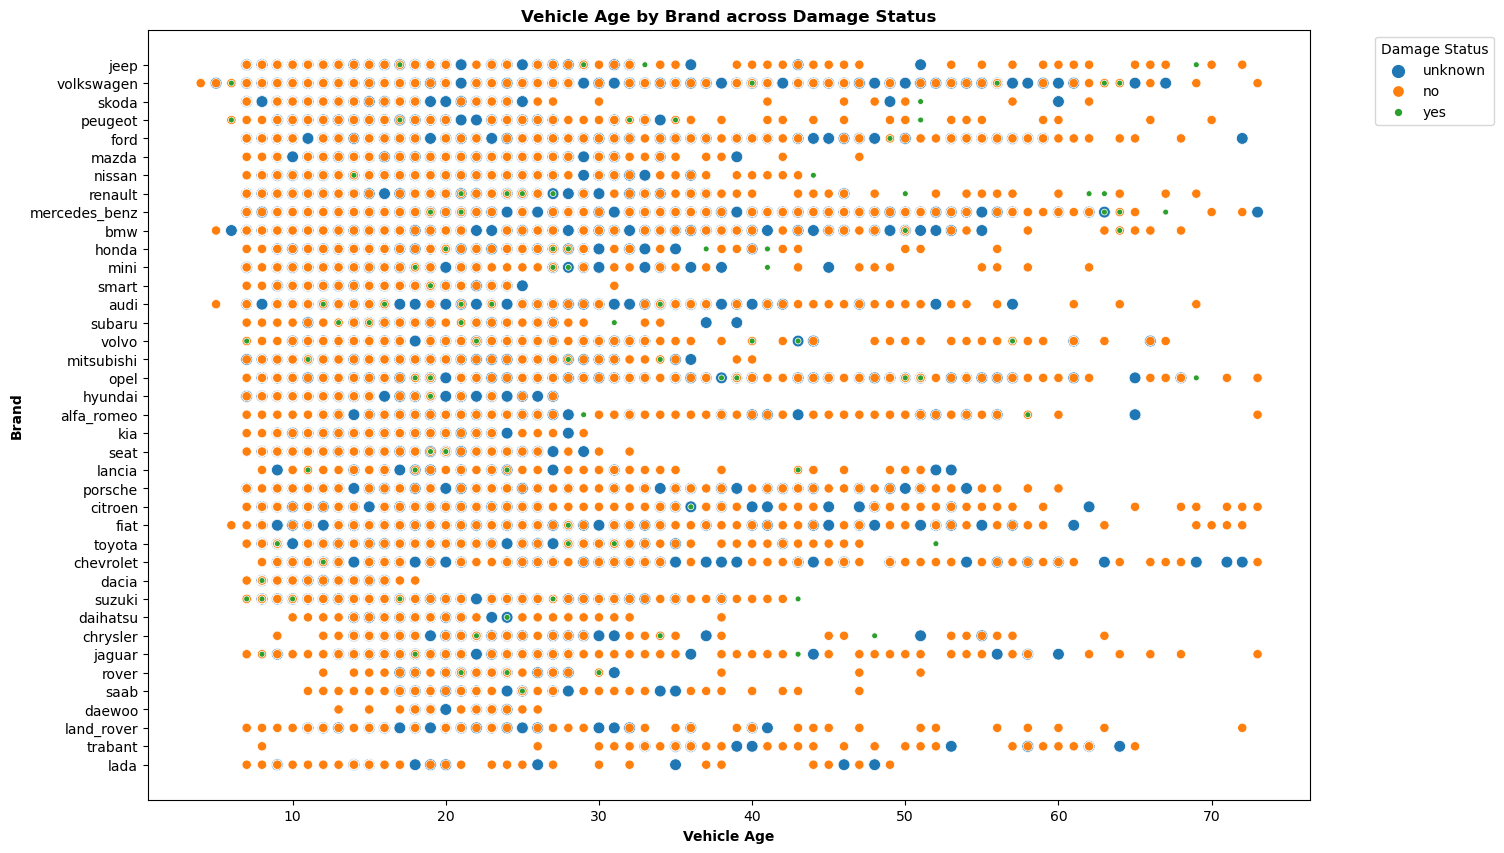

2        2004-08-01
3        2001-06-01
4        2008-07-01
6        2004-08-01
8        2014-08-01
            ...    
371521   2000-03-01
371524   2000-03-01
371525   1996-03-01
371526   2002-06-01
371527   2013-08-01
Name: dateOfRegistration, Length: 234772, dtype: datetime64[ns]

In [234]:
plt.figure(figsize=[15, 10])
sns.scatterplot(data=cars_df_clean, x='vehicle_age', y='brand', hue='notRepairedDamage', size='notRepairedDamage')
plt.xlabel('Vehicle Age', weight='bold')
plt.ylabel('Brand', weight='bold')
plt.title('Vehicle Age by Brand across Damage Status', weight='bold')
plt.legend(title='Damage Status', bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

> It makes sense to see that vehicles without damage across manufacturer and age.

##### How does vehicle age affect price across damage status?

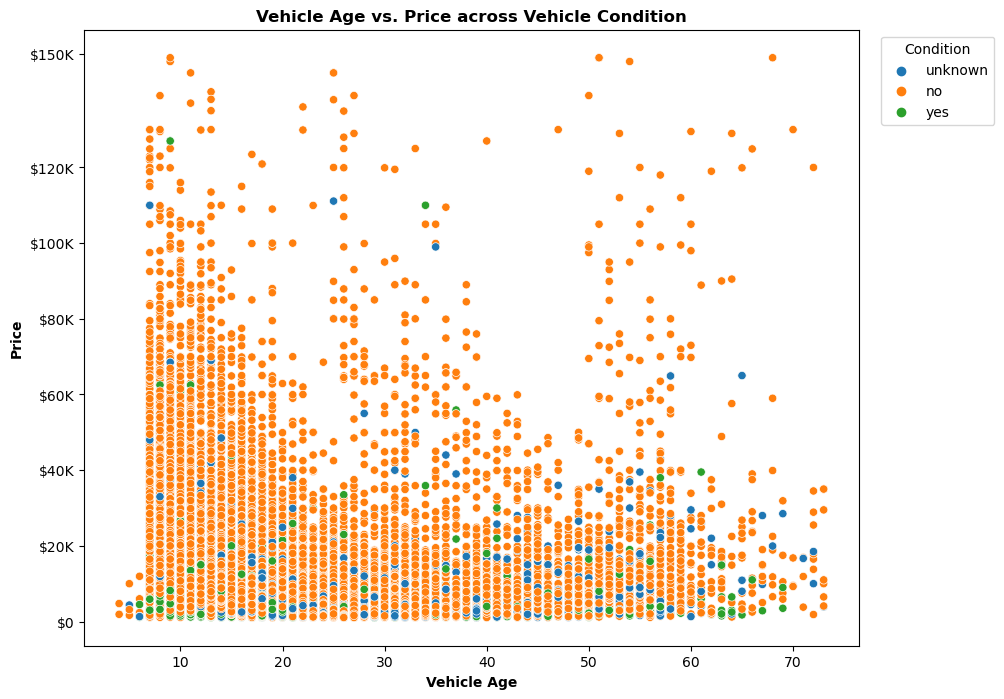

In [235]:
plt.figure(figsize=[10, 8])
sns.scatterplot(data=cars_df_clean, x='vehicle_age', y='price', hue='notRepairedDamage')
plt.xlabel('Vehicle Age', weight='bold')
plt.ylabel('Price', weight='bold')
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 150000],
          ['$0', '$20K', '$40K', '$60K', '$80K', '$100K', '$120K', '$150K'])
plt.title('Vehicle Age vs. Price across Vehicle Condition', weight='bold')
plt.legend(title='Condition', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

> We can observe vehicle price decrease as vehicle age increases for vehicles without damage. We also see a vintage vehicle without damage tends to be high priced.

### Advanced Analysis and Predictive Modeling

##### Regression Analysis

In [236]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Prepare the data
X = cars_df_clean[['powerPS', 'kilometer', 'vehicle_age']]
y = cars_df_clean['price']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict prices
cars_df_clean['predicted_price'] = model.predict(X)

# Sort by predicted price to find cars providing best value for money
best_value_cars = cars_df_clean.sort_values(by='predicted_price')

# Print the top 10 cars with best value for money
print("Cars providing best value for money:")
print(best_value_cars.head(10))

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['brand', 'model', 'vehicleType', 'fuelType', 'notRepairedDamage']),
    remainder='passthrough')


Cars providing best value for money:
                                                     name   seller offerType  \
361190                      1950_Chevrolet_Buisness_Coupe  private   Angebot   
78336              Hot_Rod__Merzedes_Benz__w124__lowrider  private   Angebot   
168458                                        Opel_Andere  private   Angebot   
44780         Chevrolet_3100___Pick_up__Thriftmaster_1956  private   Angebot   
333231                    Willys_M38_A1_Ersatzteiltraeger  private   Angebot   
275094                             T1_Bulli_11_Fensterbus  private   Angebot   
331877                        Opel_Rekord__Olypia_Caravan  private   Angebot   
243992                               Mercedes_Benz_Andere  private   Angebot   
206426                                JEEP_M170_AMBULANCE  private   Angebot   
170339  Renault_4CV_Cremeschnittchen_pure_Nostalgie_Ol...  private   Angebot   

        price    vehicleType    gearbox  powerPS        model  kilometer  \
361190

2        2004-08-01
3        2001-06-01
4        2008-07-01
6        2004-08-01
8        2014-08-01
            ...    
371521   2000-03-01
371524   2000-03-01
371525   1996-03-01
371526   2002-06-01
371527   2013-08-01
Name: dateOfRegistration, Length: 234772, dtype: datetime64[ns]

In [261]:
# Select features and target
features = ['vehicle_age', 'brand', 'model', 'vehicleType', 'powerPS', 'kilometer', 'fuelType', 'notRepairedDamage']
target = 'price'
X = cars_df_clean[features]
y = cars_df_clean[target]

# Preprocessing
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['brand', 'model', 'vehicleType', 'fuelType', 'notRepairedDamage']),
    remainder='passthrough')


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Interpret the results
coefs = model.named_steps['linearregression'].coef_
features = model.named_steps['columntransformer'].get_feature_names_out()
pd.Series(coefs, index=features).sort_values(ascending=False)

Root Mean Squared Error: 4968.488680833091


onehotencoder__model_911                    25578.297899
onehotencoder__brand_porsche                21823.662672
onehotencoder__model_mustang                17448.523356
onehotencoder__model_g_klasse               14257.655356
onehotencoder__model_m_reihe                11460.086652
onehotencoder__model_gl                     11334.546928
onehotencoder__brand_jaguar                 11271.831802
onehotencoder__model_sl                     11009.693570
onehotencoder__model_kaefer                 10788.996103
onehotencoder__brand_bmw                     9498.878073
onehotencoder__brand_land_rover              9279.327664
onehotencoder__brand_audi                    8559.710692
onehotencoder__model_kadett                  7261.780252
onehotencoder__model_spider                  7233.786132
onehotencoder__model_wrangler                6979.002843
onehotencoder__model_cx_reihe                6934.191915
onehotencoder__model_defender                6355.567232
onehotencoder__model_range_rove

> Based on the coefficients of the linear regression model, we can interpret the results as follows:

- The expected price of a car that is a Porsche 911 model, assuming all other features are held constant, is higher by about $25,578. This means that, all else being equal, a Porsche 911 tends to be more expensive than other car models.

- Similarly, the expected price of a car that is of the Porsche brand, assuming all other features are held constant, is higher by about $21,823. This means that, all else being equal, a Porsche car tends to be more expensive than cars of other brands.

- On the other hand, the expected price of a car that is a Freelander model, assuming all other features are held constant, is lower by about $9,926. This means that, all else being equal, a Freelander tends to be less expensive than other car models. In other words, if you were to compare two cars that are identical in all aspects except that one is a Freelander and the other is of the baseline model, the Freelander is expected to be cheaper by about $10,348.

To be more precise, we could say that with 95% probability the price of a car with the aforementioned features would fall within a certain range.

##### I'll use classification models to predict vehicle types based on features like powerPS, price and brand.

In [242]:
# Select features and target
features = ['powerPS', 'price', 'brand']
target = 'vehicleType'

# Copy the data
df = cars_df_clean.copy()

# Encode categorical features
for feature in features:
    if df[feature].dtype == 'object':
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

          bus       0.49      0.47      0.48      4923
  convertible       0.50      0.45      0.47      3741
        coupe       0.40      0.31      0.35      2810
    limousine       0.52      0.59      0.55     13991
        other       0.11      0.05      0.07       326
    small car       0.74      0.77      0.75      8776
station wagon       0.49      0.47      0.48      9939
          suv       0.63      0.61      0.62      2449

     accuracy                           0.55     46955
    macro avg       0.49      0.46      0.47     46955
 weighted avg       0.55      0.55      0.55     46955



2        2004-08-01
3        2001-06-01
4        2008-07-01
6        2004-08-01
8        2014-08-01
            ...    
371521   2000-03-01
371524   2000-03-01
371525   1996-03-01
371526   2002-06-01
371527   2013-08-01
Name: dateOfRegistration, Length: 234772, dtype: datetime64[ns]

> The machine learning model, trained to identify vehicle types based on features such as power, price, and brand, provides an evaluation of its performance through precision, recall, f1-score, and accuracy metrics. With an overall accuracy of 55%, the model demonstrates higher precision in predicting 'small car' and 'suv' types (0.74 and 0.63, respectively) compared to the 'other' category (0.13). While the model's performance suggests room for improvement, it provides valuable insights that can guide further tuning or the inclusion of additional data.


##### 	Anomaly Detection using the Isolation Forest method

In [244]:
# Select only the 'price' and 'powerPS' columns
data = cars_df_clean[['price', 'powerPS']]

# Fit the model
clf = IsolationForest(contamination=0.01)
clf.fit(data)

# Predict the anomalies in the data
pred = clf.predict(data)

# The model will output -1 for anomalies and 1 for normal data points
cars_df_clean['anomaly'] = pred

/Users/levgiorg/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


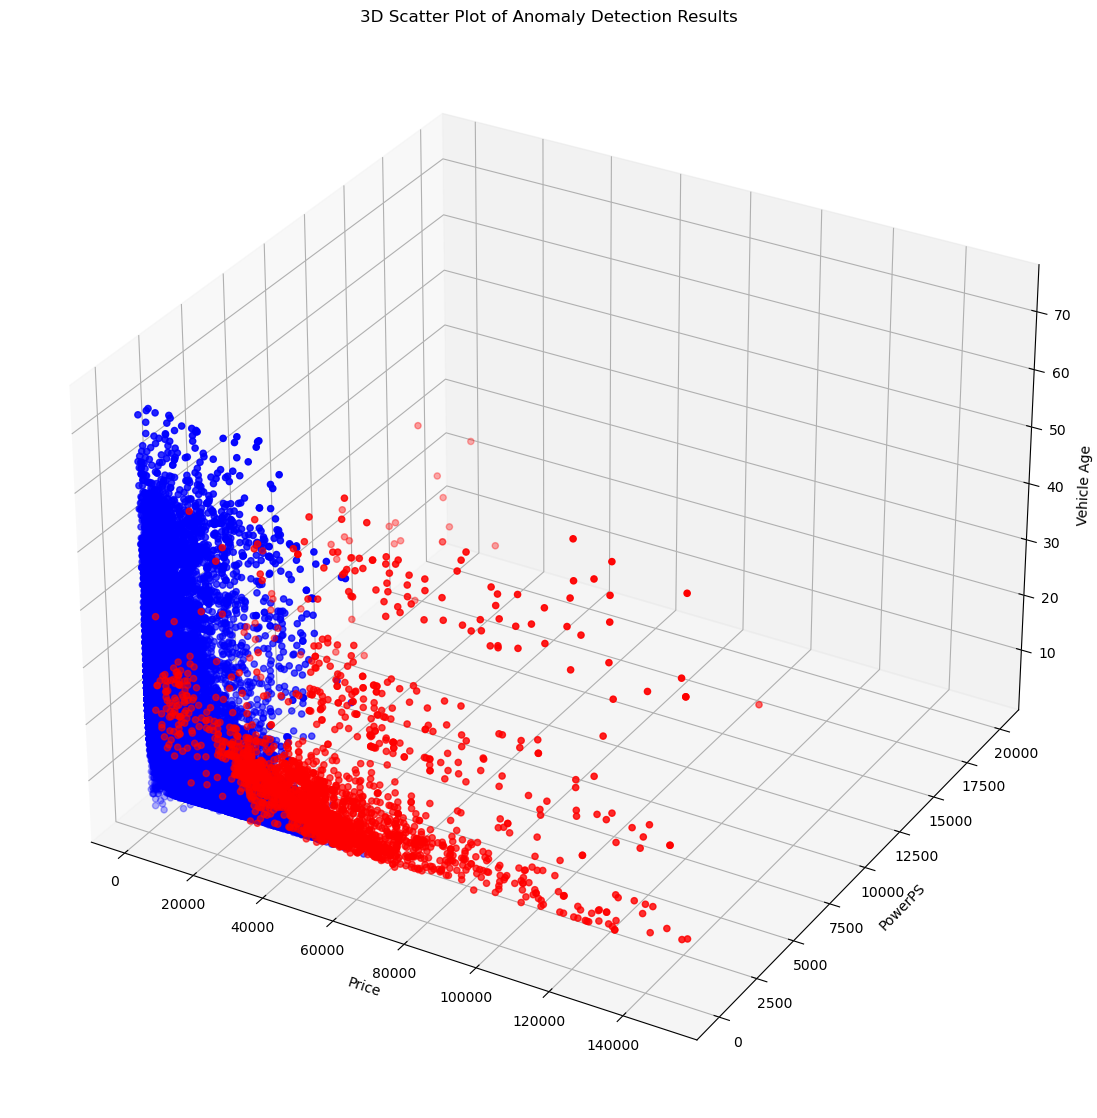

2        2004-08-01
3        2001-06-01
4        2008-07-01
6        2004-08-01
8        2014-08-01
            ...    
371521   2000-03-01
371524   2000-03-01
371525   1996-03-01
371526   2002-06-01
371527   2013-08-01
Name: dateOfRegistration, Length: 234772, dtype: datetime64[ns]

In [245]:


fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')

# Normal data points are colored in blue
ax.scatter(cars_df_clean.loc[cars_df_clean['anomaly'] == 1, 'price'], 
           cars_df_clean.loc[cars_df_clean['anomaly'] == 1, 'powerPS'], 
           cars_df_clean.loc[cars_df_clean['anomaly'] == 1, 'vehicle_age'], 
           c='blue')

# Anomalies are colored in red
ax.scatter(cars_df_clean.loc[cars_df_clean['anomaly'] == -1, 'price'], 
           cars_df_clean.loc[cars_df_clean['anomaly'] == -1, 'powerPS'], 
           cars_df_clean.loc[cars_df_clean['anomaly'] == -1, 'vehicle_age'], 
           c='red')

ax.set_xlabel('Price')
ax.set_ylabel('PowerPS')
ax.set_zlabel('Vehicle Age')
plt.title('3D Scatter Plot of Anomaly Detection Results')
plt.show()


>The blue dots represent normal data points, while the red dots represent anomalies. Observing the plot, we can clearly identify that certain cars have a power output of over 5000 PS, which is undoubtedly an anomaly.

##### Price Range Recommendation

I'll create a recommender system that suggests appropriate price ranges for used cars based on their features, market trends, and comparable listings. This can help sellers set reasonable prices and buyers make informed decisions.

In [246]:
# Convert categorical features to one-hot encoding
features = pd.get_dummies(cars_df_clean[['brand', 'model', 'vehicle_age', 'powerPS', 'kilometer']])

# Define the target variable
target = cars_df_clean['price']

# Split the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a random forest regressor on the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features_train, target_train)

# Define a function to recommend a price for a car
def recommend_price(brand, car_model, vehicle_age, powerPS, kilometer):
    # Create a DataFrame containing the car's features
    car_features = pd.DataFrame({
        'brand': [brand],
        'model': [car_model],
        'vehicle_age': [vehicle_age],
        'powerPS': [powerPS],
        'kilometer': [kilometer]
    })
    
    # Convert the categorical features to one-hot encoding
    car_features = pd.get_dummies(car_features).reindex(columns=features.columns, fill_value=0)
    
    # Use the trained model to predict the car's price
    predicted_price = model.predict(car_features)
    
    # Print the recommended price with some context
    print(f"The recommended price for a {brand} {car_model} of age {vehicle_age} years, with power {powerPS} PS and {kilometer} kilometers is approximately ${predicted_price[0]:.2f}.")

# Test the function with an example car
recommend_price('bmw', '3er', 5, 150, 100000)

The recommended price for a bmw 3er of age 5 years, with power 150 PS and 100000 kilometers is approximately $20081.15.


2        2004-08-01
3        2001-06-01
4        2008-07-01
6        2004-08-01
8        2014-08-01
            ...    
371521   2000-03-01
371524   2000-03-01
371525   1996-03-01
371526   2002-06-01
371527   2013-08-01
Name: dateOfRegistration, Length: 234772, dtype: datetime64[ns]

##### Time Series Analysis

>I'll apply time series analysis techniques to understand temporal patterns in car listings, such as the fluctuation of prices over time, seasonal trends, or the average lifespan of listings before being sold.  

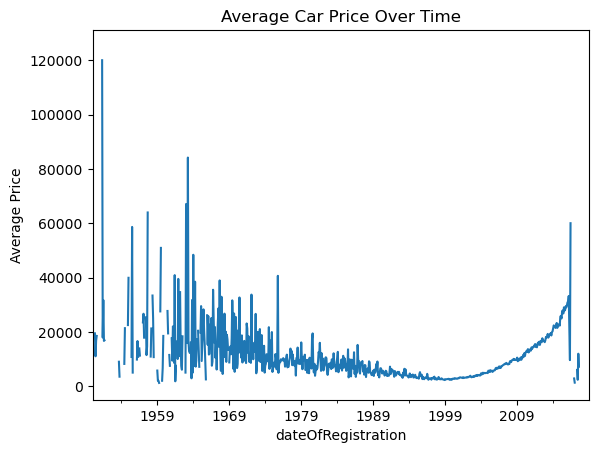

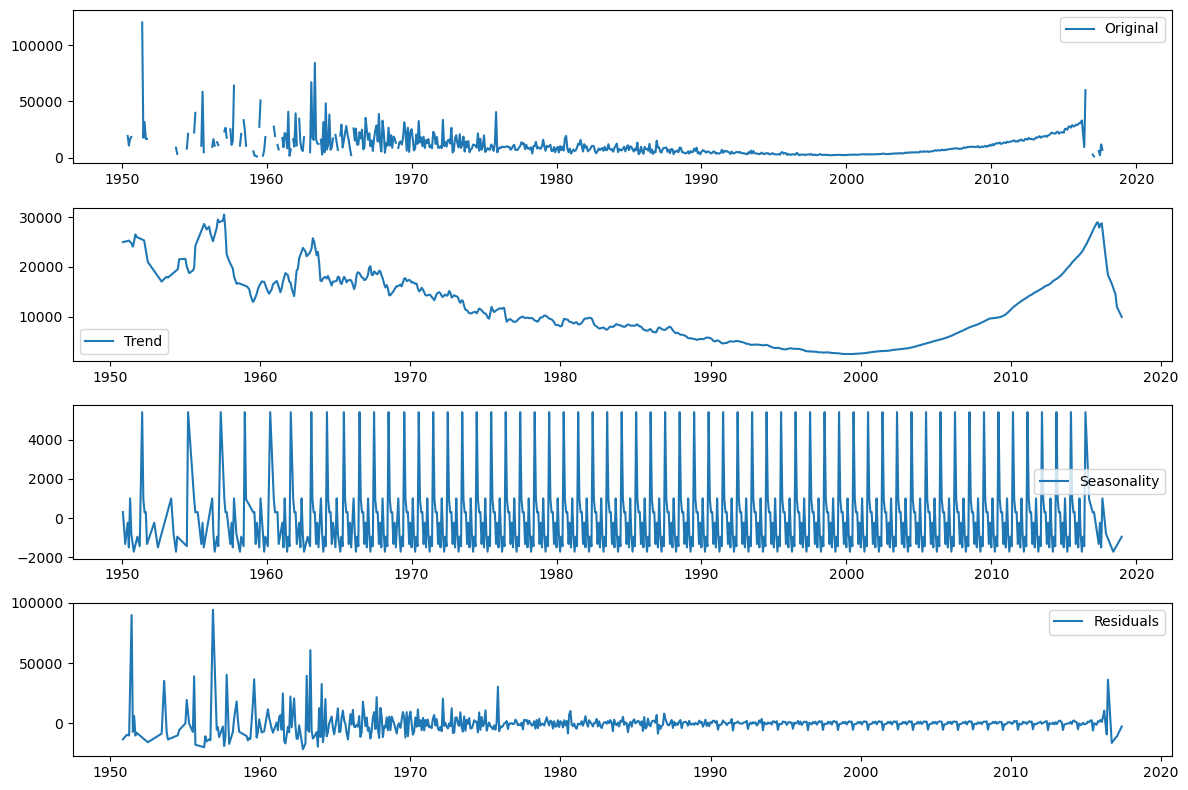

In [247]:
# Convert the date column to datetime format
cars_df_clean['dateOfRegistration'] = pd.to_datetime(cars_df_clean['dateOfRegistration'])

# Set the date column as the index of the DataFrame
cars_df_clean.set_index('dateOfRegistration', inplace=True)

# Resample the data on a monthly basis and calculate the average price
monthly_avg_price = cars_df_clean['price'].resample('M').mean()

# Plot the time series data
monthly_avg_price.plot()
plt.title('Average Car Price Over Time')
plt.ylabel('Average Price')
plt.show()

# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(monthly_avg_price.dropna(), period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(monthly_avg_price, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- From the first plot, we can observe that during the 1950s to 1960s, the average price of used cars was relatively high. However, there was a downward trend in prices from the 1960s to around 2000, indicating that used cars were becoming more affordable over time. Interestingly, from around 2000 onwards, we see an upward trend in the average price of used cars, suggesting that the prices started to increase again.

- The trend plot(second plot) shows the average price of used cars from the 1950s to 2018. Prices were high in the early years, decreased from the mid-1960s to the late 1980s, then steadily increased from the 1990s to 2015. After 2015, there was a sharp decline. These trends could be due to factors like car availability, economic conditions, and consumer preferences. The data for 2018 is missing, so we can't comment on that year.